<a href="https://colab.research.google.com/github/shahikiran/DataWarehouseDataMining/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#implemention of ID3

import pandas as pd
import numpy as np

df=pd.read_csv("/content/buy.csv")

#first ma entropy
def entropy(target_col):
  elements, counts = np.unique(target_col, return_counts=True)
  entropy_val = -np.sum([(count / len(target_col)) * np.log2(count / len(target_col)) for count in counts]) #entropy formula
  return entropy_val


#then information gain
def information_gain(data,feature,target_col,):
  total_entropy = entropy(data[target_col])  #entropy of the entire dataset with respect to the target column.
  values, counts = np.unique(data[feature], return_counts=True)
  weighted_entropy = np.sum([(counts[i] / len(data)) * entropy(data[data[feature] == values[i]][target_col])
                              for i in range(len(values))])
  return total_entropy - weighted_entropy #IG(S,A)=Entropy(S)−∑v∈Values(A)|Sv||S|Entropy(Sv)

def id3(data, features, target_col):

    target_values, target_counts = np.unique(data[target_col], return_counts=True)
     # If all target values are the same, return that value
    if len(target_values) == 1:
         return target_values[0]

    # If no features left, return most common target value
    if not features:
        most_common = data[target_col].mode()[0]
        return most_common

    # Find best feature
    best_feature = max(features, key=lambda f: information_gain(data, f, target_col), default=None)
    tree = {best_feature: {}}

    # Remove best feature from list
    features = [f for f in features if f != best_feature]

    # Build subtree for each value of best feature
    for value in np.unique(data[best_feature]):
        sub_data = data[data[best_feature] == value]
        tree[best_feature][value] = id3(sub_data, features, target_col)

    return tree

# Enhanced visualize tree function
def print_tree(tree, prefix="", parent_value="", level=0):
    # If leaf node, print prediction
    if not isinstance(tree, dict):
        print(f"{prefix}└── Decision: {parent_value}Predict {tree}")
        return

    # Print current feature
    feature = list(tree.keys())[0]
    print(f"{prefix}├── Feature: {feature}")

    # Iterate through each value of the feature
    for value, subtree in tree[feature].items():
        new_prefix = prefix + "│   " if level > 0 else ""
        print_tree(subtree, new_prefix, f"{value} -> ", level + 1)

target_col = 'Class'  # Correct target column

features = [col for col in df.columns if col != target_col]
for feature in features:
    print(f"Unique values in {feature}: {np.unique(df[feature]).tolist()}")

# Build and print tree
tree = id3(df, features, target_col)
print("\nDecision Tree:")
print_tree(tree)

Unique values in Age: ['Middle_Aged', 'Senior', 'Youth']
Unique values in Income: ['High', 'Low', 'Medium']
Unique values in Student: ['No', 'Yes']
Unique values in Credit_Rating: ['Excellent', 'Fair']

Decision Tree:
├── Feature: Age
├── Feature: Income
│   └── Decision: High -> Predict No
│   ├── Feature: Credit_Rating
│   │   └── Decision: Excellent -> Predict No
│   │   ├── Feature: Student
│   │   │   └── Decision: Yes -> Predict Buy
│   └── Decision: Medium -> Predict No
├── Feature: Credit_Rating
│   ├── Feature: Income
│   │   ├── Feature: Student
│   │   │   └── Decision: No -> Predict Buy
│   │   └── Decision: Low -> Predict Buy
│   │   └── Decision: Medium -> Predict Buy
│   └── Decision: Fair -> Predict No
├── Feature: Student
│   ├── Feature: Credit_Rating
│   │   └── Decision: Excellent -> Predict No
│   │   └── Decision: Fair -> Predict Buy
│   └── Decision: Yes -> Predict Buy


In [ ]:
import pandas as pd
import numpy as np
import os


df = pd.read_csv('buy.csv')



# Naive Bayes implementation
class NaiveBayes:
    def __init__(self):
        self.priors = {}
        self.likelihoods = {}
        self.classes = None
        self.features = None

    def fit(self, data, features, target_col):
        self.features = features
        self.classes = np.unique(data[target_col])

        # Calculate prior probabilities
        for c in self.classes:
            self.priors[c] = len(data[data[target_col] == c]) / len(data)

        # Calculate likelihoods P(feature_value | class)
        for feature in features:
            self.likelihoods[feature] = {}
            for c in self.classes:
                self.likelihoods[feature][c] = {}
                class_data = data[data[target_col] == c]
                values = np.unique(data[feature])
                for value in values:
                    count = len(class_data[class_data[feature] == value])
                    self.likelihoods[feature][c][value] = (count + 1) / (len(class_data) + len(values))  # Laplace smoothing

    def predict(self, instance):
        probs = {}
        for c in self.classes:
            prob = self.priors[c]
            for feature in self.features:
                value = instance[feature]
                prob *= self.likelihoods[feature][c].get(value, 1 / (len(df[df['Class'] == c]) + len(np.unique(df[feature]))))  # Laplace for unseen values
            probs[c] = prob
        return max(probs, key=probs.get), probs

# Main execution
target_col = 'Class'  # Target column
if target_col not in df.columns:
    print(f"Error: Target column '{target_col}' not found. Available columns: {list(df.columns)}")
    raise ValueError("Update target_col to match your dataset's target column.")
features = [col for col in df.columns if col != target_col]
print(f"\nTarget column: {target_col}")
print(f"Features: {features}")
for feature in features:
    print(f"Unique values in {feature}: {np.unique(df[feature]).tolist()}")

# Train Naive Bayes
nb = NaiveBayes()
nb.fit(df, features, target_col)

# Print prior probabilities
print("\nPrior Probabilities:")
for c in nb.classes:
    print(f"P({c}) = {nb.priors[c]:.4f}")

# Predict for the first instance
print("\nExample Prediction:")
sample = df.iloc[0]
prediction, probs = nb.predict(sample)
print(f"Instance: {sample.to_dict()}")
print(f"Probabilities: { {c: f'{p:.4f}' for c, p in probs.items()} }")
print(f"Predicted class: {prediction}")


Target column: Class
Features: ['Age', 'Income', 'Student', 'Credit_Rating']
Unique values in Age: ['Middle_Aged', 'Senior', 'Youth']
Unique values in Income: ['High', 'Low', 'Medium']
Unique values in Student: ['No', 'Yes']
Unique values in Credit_Rating: ['Excellent', 'Fair']

Prior Probabilities:
P(Buy) = 0.4500
P(No) = 0.5500

Example Prediction:
Instance: {'Age': 'Youth', 'Income': 'Low', 'Student': 'Yes', 'Credit_Rating': 'Excellent', 'Class': 'Buy'}
Probabilities: {'Buy': '0.0223', 'No': '0.0090'}
Predicted class: Buy


Dataset:
   X1  X2  t
0  -1  -1 -1
1  -1   1  1
2   1  -1  1
3   1   1 -1
Epoch 0, Loss: 0.2500
Epoch 100, Loss: 0.2500
Epoch 200, Loss: 0.2500
Epoch 300, Loss: 0.2500
Epoch 400, Loss: 0.2500
Epoch 500, Loss: 0.2500
Epoch 600, Loss: 0.2500
Epoch 700, Loss: 0.2500
Epoch 800, Loss: 0.2500
Epoch 900, Loss: 0.2500

Predictions:
Input: [-1 -1], True: -1, Predicted: 1
Input: [-1  1], True: 1, Predicted: 1
Input: [ 1 -1], True: 1, Predicted: -1
Input: [1 1], True: -1, Predicted: -1


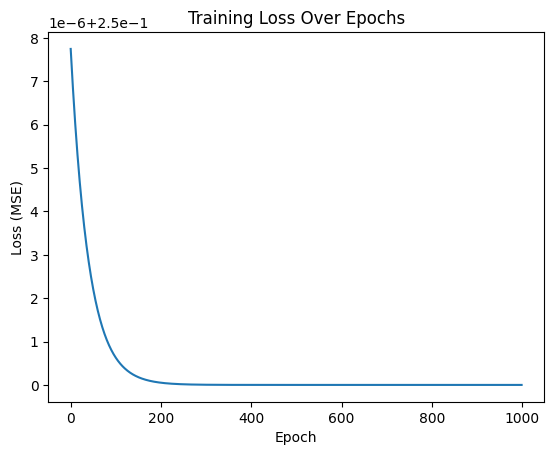

In [ ]:
import numpy as np
import pandas as pd



# Define dataset
data = {
    'X1': [-1, -1, 1, 1],
    'X2': [-1, 1, -1, 1],
    't': [-1, 1, 1, -1]
}
df = pd.DataFrame(data)
print("Dataset:")
print(df)

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size=2, hidden_size=4, output_size=1):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate=0.1):
        # Backward pass
        m = X.shape[0]
        # Map target [-1, 1] to [0, 1] for sigmoid
        y_mapped = (y + 1) / 2  # -1 -> 0, 1 -> 1
        # Output layer gradients
        error = output - y_mapped
        dW2 = np.dot(self.a1.T, error * sigmoid_derivative(output)) / m
        db2 = np.sum(error * sigmoid_derivative(output), axis=0, keepdims=True) / m
        # Hidden layer gradients
        d_hidden = np.dot(error * sigmoid_derivative(output), self.W2.T) * sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, d_hidden) / m
        db1 = np.sum(d_hidden, axis=0, keepdims=True) / m
        # Update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        # Calculate MSE loss
        return np.mean(error ** 2)

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = self.backward(X, y, output, learning_rate)
            losses.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return losses

    def predict(self, X):
        output = self.forward(X)
        # Convert sigmoid output [0,1] to [-1,1]
        return np.where(output >= 0.5, 1, -1)

# Prepare data
X = df[['X1', 'X2']].values
y = df['t'].values.reshape(-1, 1)

# Train neural network
nn = NeuralNetwork()
losses = nn.train(X, y, epochs=1000, learning_rate=0.1)

# Predict on dataset
predictions = nn.predict(X)
print("\nPredictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, True: {y[i][0]}, Predicted: {predictions[i][0]}")

# Visualize training loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Over Epochs")
plt.show()